In this notebook we use support vector machines (SVMs) to learn a model that can distinguish between the spam data (food reviews) and legitimate data (Austen). 

We begin by loading in the feature vectors which we generated in either notebook [02-feature-engineering](02-feature-engineering.ipynb) or notebook [02a-feature-engineering](02a-feature-engineering.ipynb). 

In [1]:
import pandas as pd

feats = pd.read_parquet("data/tfidf_features.parquet")

/anaconda2/envs/ml-workflows-for-developers/lib/python3.6/site-packages/pyarrow/pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
/anaconda2/envs/ml-workflows-for-developers/lib/python3.6/site-packages/pyarrow/pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
/anaconda2/envs/ml-workflows-for-developers/lib/python3.6/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [2]:
feats.sample(10)

,index,label,0,1,2,3,4,5,6,7,...,7990,7991,7992,7993,7994,7995,7996,7997,7998,7999
623,623,legitimate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7007,7007,legitimate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15659,15659,legitimate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18017,18017,legitimate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22242,2242,spam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27176,7176,spam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29284,9284,spam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5234,5234,legitimate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1637,1637,legitimate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7753,7753,legitimate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
from sklearn import model_selection
train, test = model_selection.train_test_split(feats)

In [4]:
from sklearn import svm

In [5]:
clf = svm.SVC(kernel = 'linear')

In [6]:
type(train)

pandas.core.frame.DataFrame

In [7]:
train1 = train.iloc[:,2:202]

In [8]:
clf.fit(X=train1, y=train["label"])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [9]:
test_pred = clf.predict(test.iloc[:,2:202])

In [10]:
test_pred

array(['spam', 'spam', 'spam', ..., 'spam', 'legitimate', 'spam'],
      dtype=object)

In [11]:
from sklearn import metrics

In [12]:
metrics.accuracy_score(test["label"], test_pred)

0.6627

In [13]:
metrics.recall_score(test["label"], test_pred, pos_label="spam")

0.970723882093443

In [14]:
metrics.precision_score(test["label"], test_pred, pos_label="spam")

0.6000247892910263

In [15]:
from mlworkflows import plot

In [16]:
df, chart = plot.binary_confusion_matrix(test["label"], test_pred)

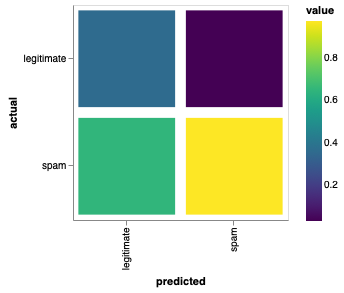

In [17]:
chart

In [18]:
df

,actual,predicted,raw_count,value
0,legitimate,legitimate,1786,0.356274
1,spam,legitimate,3227,0.643726
2,legitimate,spam,146,0.029276
3,spam,spam,4841,0.970724


In [20]:
from sklearn.metrics import classification_report
print(classification_report(test.label.values, test_pred))

              precision    recall  f1-score   support

  legitimate       0.92      0.36      0.51      5013
        spam       0.60      0.97      0.74      4987

   micro avg       0.66      0.66      0.66     10000
   macro avg       0.76      0.66      0.63     10000
weighted avg       0.76      0.66      0.63     10000

